In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [ ]:
iris = load_iris()

data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


paso a paso

In [ ]:
cov_matrix = np.cov(data.T)
print(cov_matrix)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [ ]:
eigval, eigvec = np.linalg.eig(cov_matrix)

print("autovalores")
print(eigval)
print("autovectores")
print(eigvec)

autovalores
[4.22824171 0.24267075 0.0782095  0.02383509]
autovectores
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [ ]:
idx_ordenados = np.argsort(eigval)[::-1]

eigval = eigval[idx_ordenados]
eigvec = eigvec[:, idx_ordenados]

print("autovalores")
print(eigval)
print("autovectores")
print(eigvec)

autovalores
[4.22824171 0.24267075 0.0782095  0.02383509]
autovectores
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [ ]:
var_exp = eigval / np.sum(eigval)
var_exp

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [ ]:
componentes = eigvec.T.dot(data.T)
print(componentes)

objeto python

In [ ]:
pca = PCA()
pca.fit(data)

print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]


In [ ]:
idx_pca = [f"PCA{i}" for i in range(1, data.shape[1]+1)]
idx_pca

['PCA1', 'PCA2', 'PCA3', 'PCA4']

In [ ]:
eigvec = pd.DataFrame(
    data = pca.components_,
    columns = data.columns,
    index = idx_pca
)
eigvec

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PCA1,0.361387,-0.084523,0.856671,0.358289
PCA2,0.656589,0.730161,-0.173373,-0.075481
PCA3,-0.582030,0.597911,0.076236,0.545831
PCA4,-0.315487,0.319723,0.479839,-0.753657


PCA1 = 0.36 sepal length (cm) - 0.08 sepal widht (cm) + 0.86 petal lenght (cm) + 0.36 petal width (cm)

In [ ]:
varexp = pca.explained_variance_ratio_
varexp

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Text(0, 0.5, '% var exp')

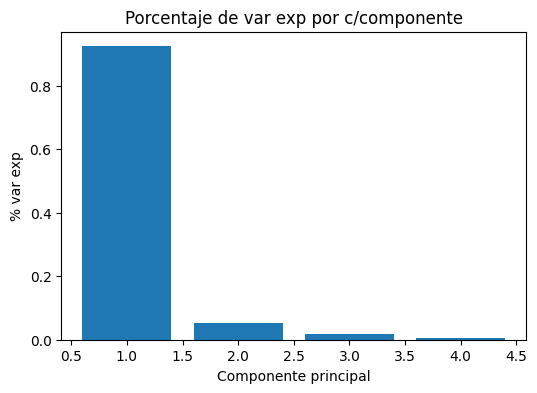

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

#agregar las barras
ax.bar(
    x = np.arange(pca.n_components_) + 1,
    height = varexp
)

#agregar etiquetas de barras
for x, y in zip(np.arange(len(data.columns)) + 1, varexp):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0,1.1)
ax.set_title("Porcentaje de var exp por c/componente")
ax.set_xlabel("Componente principal")
ax.set_ylabel("% var exp")


In [ ]:
varexpac = pca.explained_variance_ratio_.cumsum()
varexpac

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

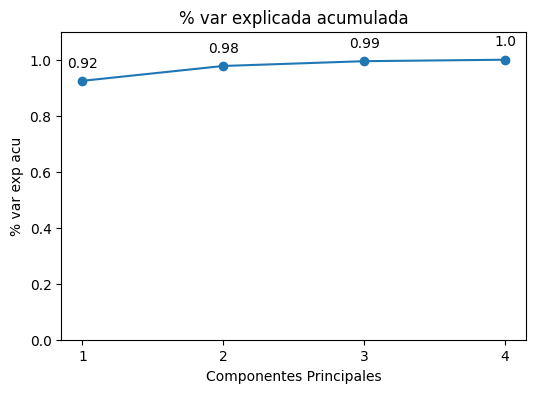

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

ax.plot(
    np.arange(len(data.columns)) + 1,
    varexpac,
    marker = 'o'
)

for x, y in zip(np.arange(len(data.columns)) + 1, varexpac):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title("% var explicada acumulada")
ax.set_xlabel("Componentes Principales")
ax.set_ylabel("% var exp acu")

plt.show()

In [ ]:
pca = PCA(n_components = 2)
pca.fit(data)

data_red_transf = pca.transform(data)

data_red_transf

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [ ]:
varexp = pca.explained_variance_ratio_
varexp

array([0.92461872, 0.05306648])

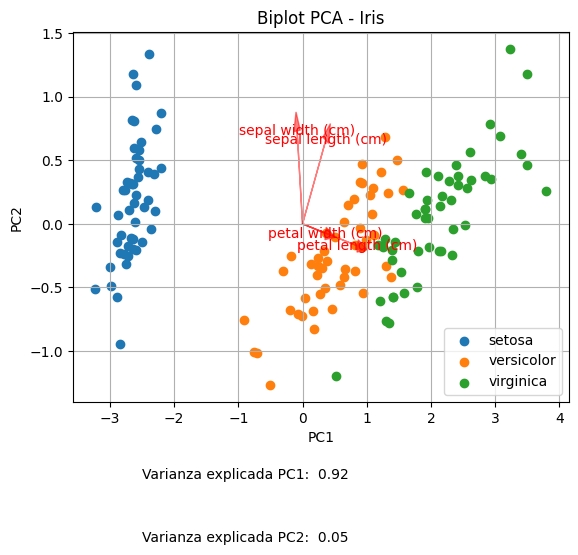

In [ ]:
fig, ax = plt.subplots()

#graficar las muestras
#ax.scatter(
#    data_red_transf[:,0],
#    data_red_transf[:,1],
#    color='b'
#)

for i, tn in enumerate(iris.target_names):
  ax.scatter(
      data_red_transf[iris.target == i,0],
      data_red_transf[iris.target == i,1],
      label = tn
  )

ax.legend()

feature_vectors = pca.components_.T
for i, fv in enumerate(feature_vectors):
  ax.arrow(0, 0, fv[0], fv[1], color='r', alpha=0.5, head_width=0.1)
  ax.text(fv[0], fv[1], data.columns[i], color='r', ha='center', va='center')


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Biplot PCA - Iris')

ax.text(-2.5, -2, f'Varianza explicada PC1:  {varexp[0]:.2f}', color='#000')
ax.text(-2.5, -2.5, f'Varianza explicada PC2:  {varexp[1]:.2f}', color='#000')

plt.grid(True)
plt.show()

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')